   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

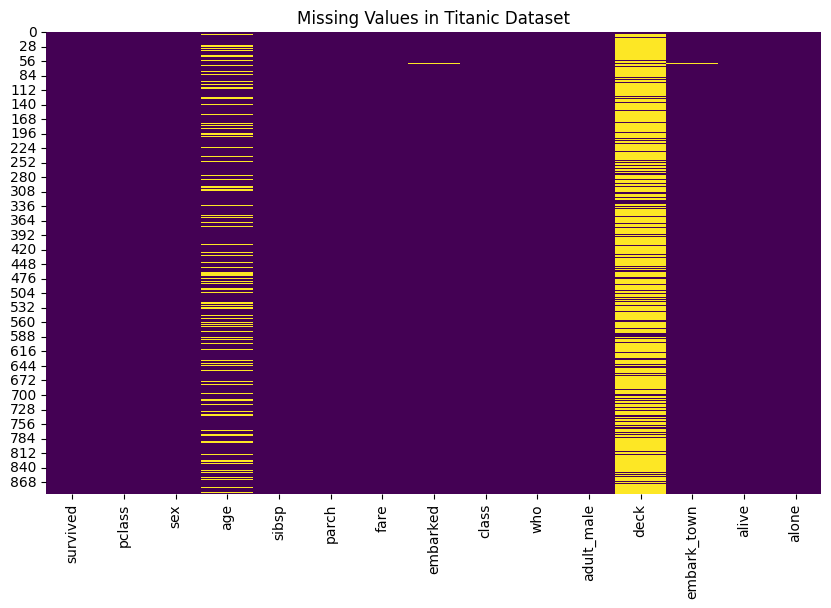

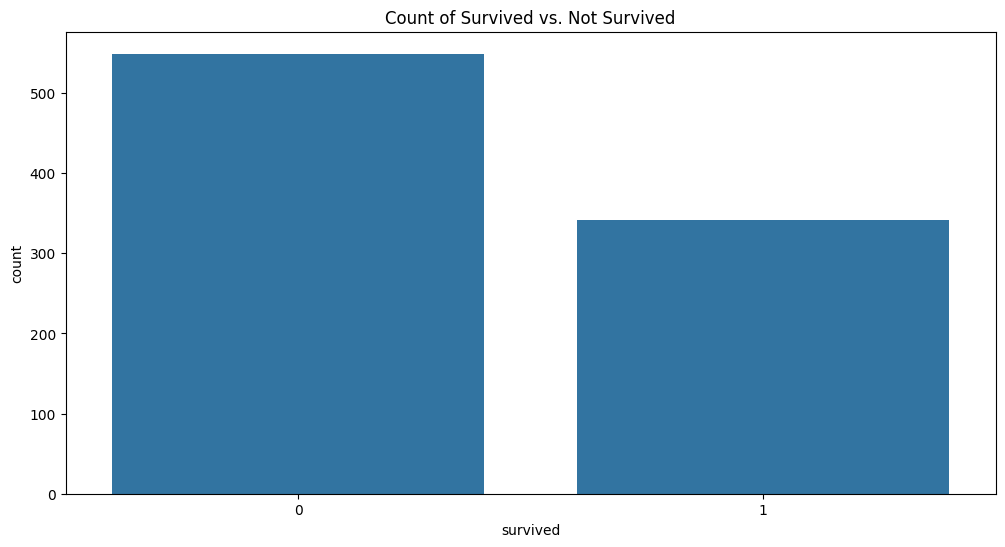

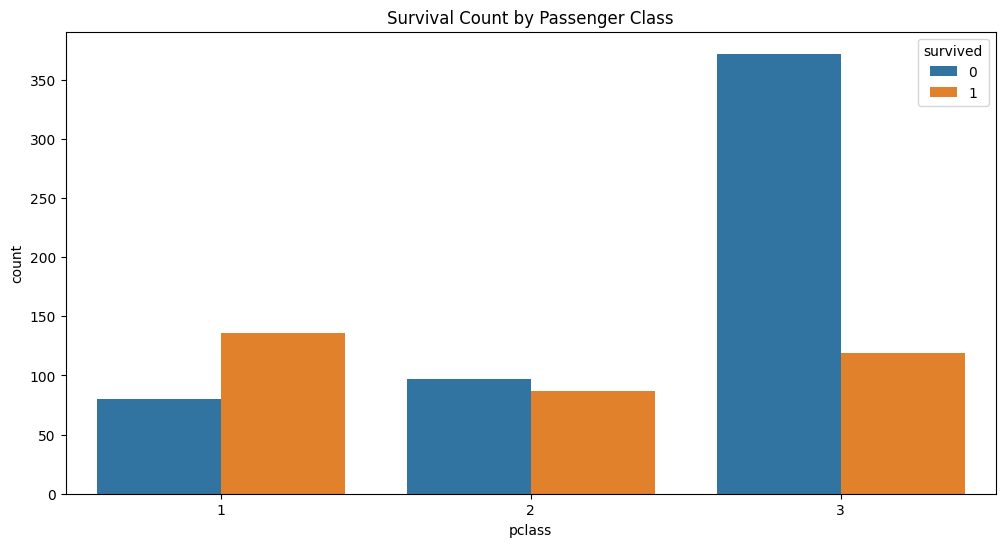

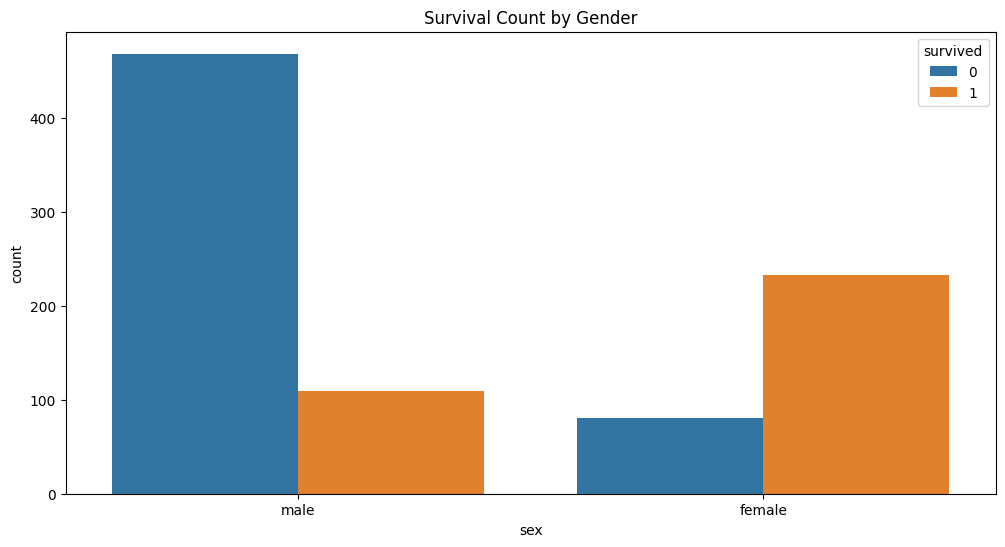

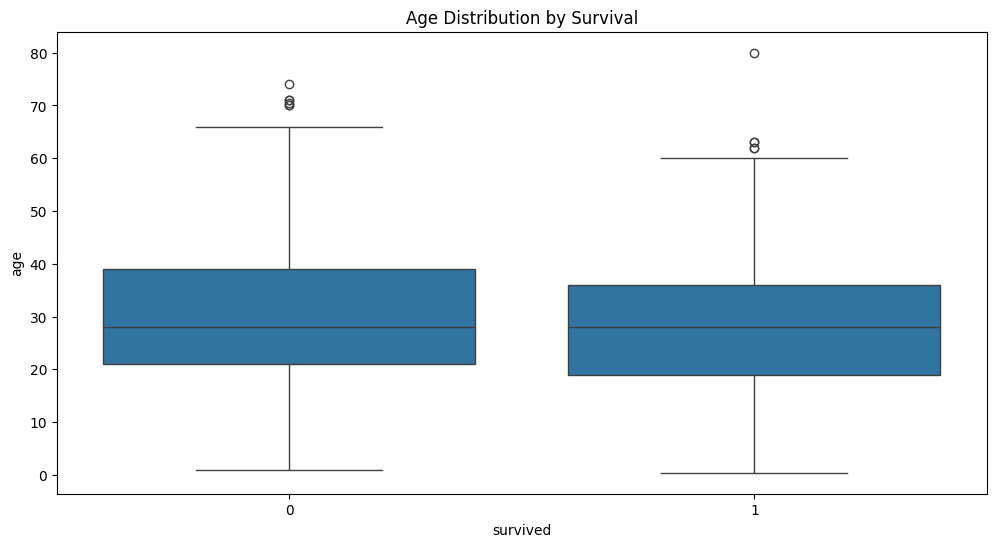

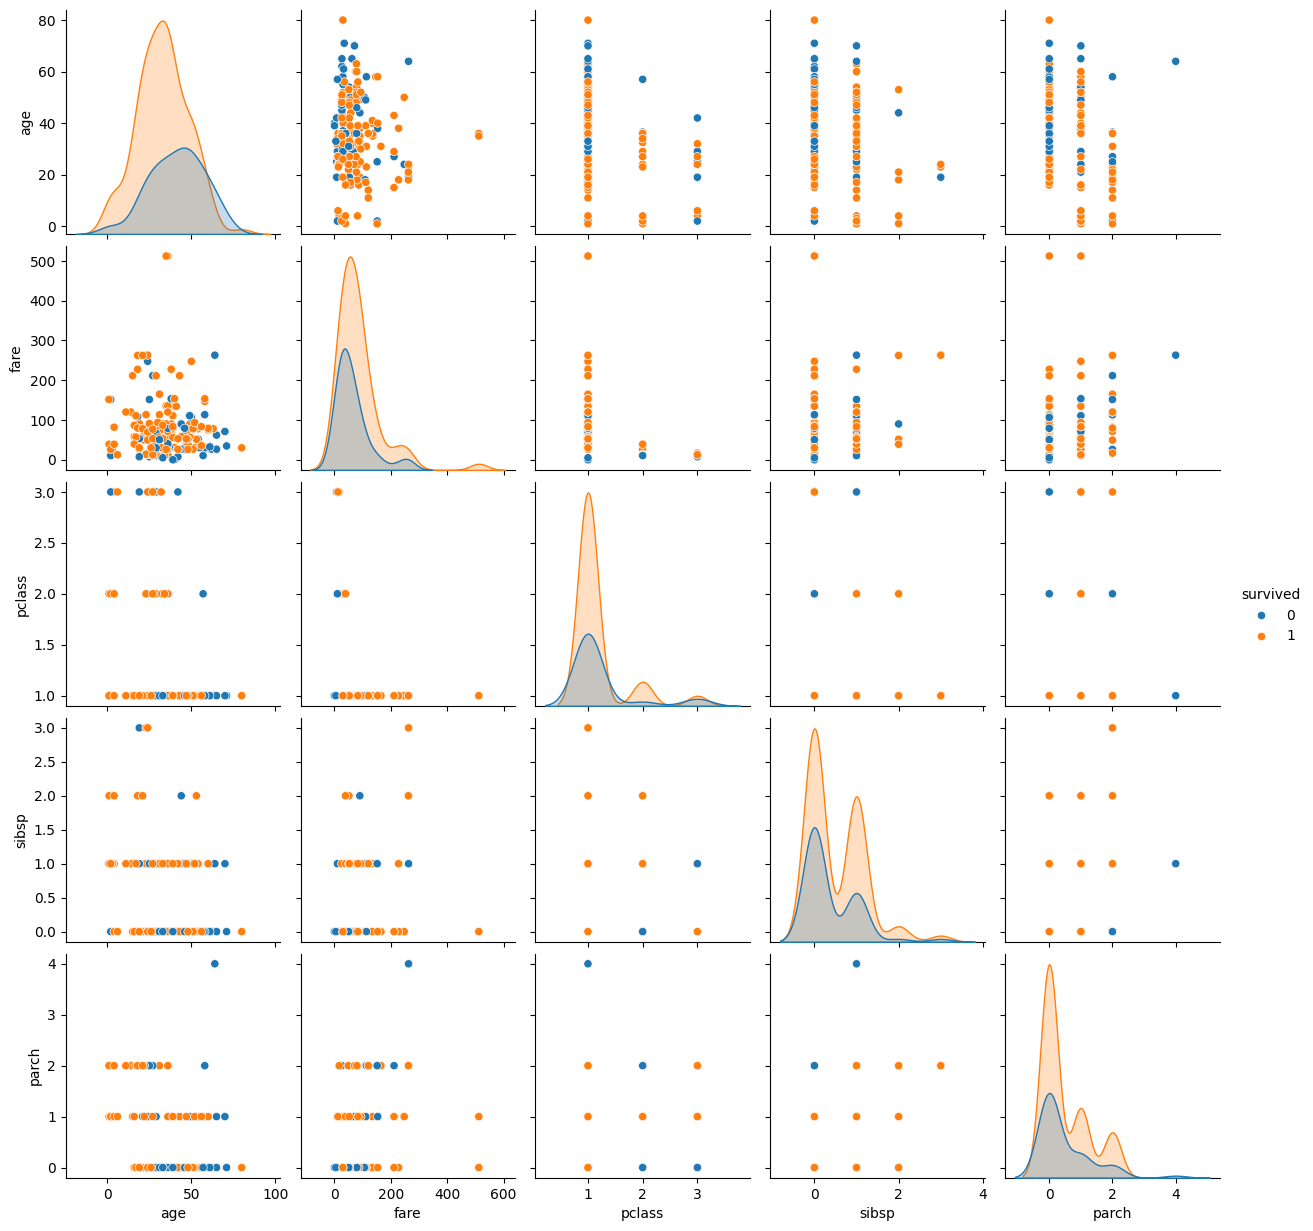

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



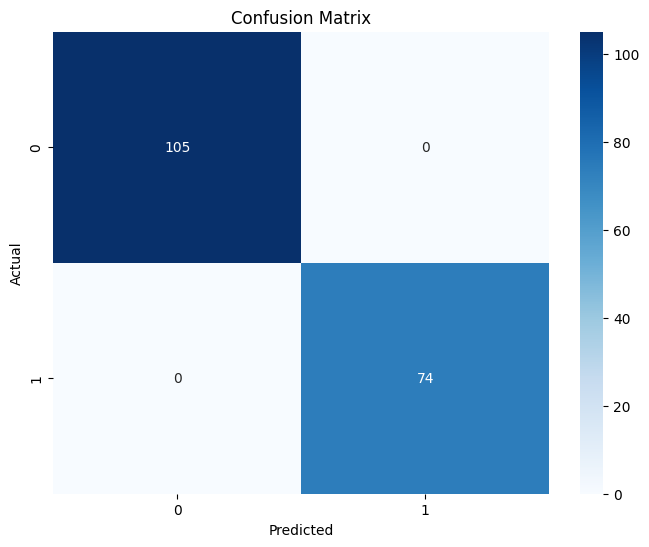

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = sns.load_dataset('titanic')

# EDA: Data Overview
print(df.head())
print(df.info())
print(df.describe())

# EDA: Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

# EDA: Categorical Variables
plt.figure(figsize=(12, 6))
sns.countplot(x='survived', data=df)
plt.title('Count of Survived vs. Not Survived')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# EDA: Pair Plot
sns.pairplot(df.dropna(), hue='survived', vars=['age', 'fare', 'pclass', 'sibsp', 'parch'])
plt.show()

# Feature Engineering
# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Add 'Unknown' category to 'deck' and fill missing values
df['deck'] = df['deck'].cat.add_categories('Unknown')
df['deck'].fillna('Unknown', inplace=True)

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['sex', 'embarked', 'deck', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], drop_first=True)

# Drop irrelevant columns
#df.drop(columns=['passenger_id', 'name', 'ticket', 'fare'], inplace=True)

# Split dataset into features and target variable
X = df.drop(columns=['survived'])
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

# Train model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
